In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics

%matplotlib inline

In [70]:
X= pd.read_csv('/home/neaf/code/ML_course/H1/dataset/data_X.csv')

In [71]:
# GRE score, TOFEL score, University rating, SOP, LOR, CGPA, Research as the input
input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']
print(X.shape)
X[input][0:10]

(500, 8)


,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [72]:
Y= pd.read_csv('/home/neaf/code/ML_course/H1/dataset/data_T.csv')

In [73]:
ans = ['Chance_of_Admit ']
print(Y.shape)
Y[ans][0:10]

(500, 2)


,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


In [74]:
list_y

[0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68, 0.5, 0.45]

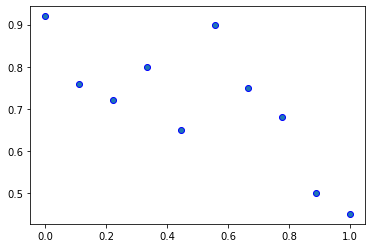

In [75]:
list_x = np.linspace(0, 1, 10)

plt.scatter(list_x, list_y, edgecolor="b", label="result");


## Cutting 30 inorder to build test data

In [107]:
# Cutting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X[input], Y[ans], random_state=42, test_size=0.33)

In [108]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8181503844496012

In [113]:
y_pred = reg.predict(X_test)


(165, 7)

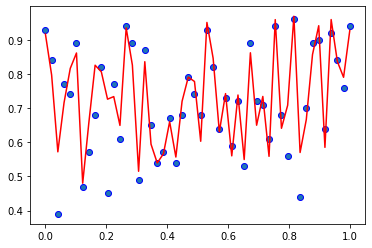

In [115]:
list_x = np.linspace(0, 1, 50)

plt.scatter(list_x, y_test[0:50], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:50], c="r", label="fitting")

## M=2 result

In [90]:
poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train) 
lin2 = LinearRegression() 

lin2.fit(X_train_poly, y_train) 

LinearRegression()

In [91]:
X_test_poly = poly.fit_transform(X_test)
y_pred = lin2.predict(X_test_poly)

print(y_pred[0:10])

[[0.77849084]
 [0.86584067]
 [0.63120174]
 [0.64602274]
 [0.93634254]
 [0.66995275]
 [0.7415809 ]
 [0.66341168]
 [0.73369205]
 [0.88907921]]


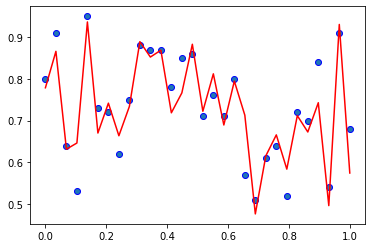

In [96]:
list_x = np.linspace(0, 1, 100)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

In [101]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE_result) 

Mean Squared Error: 0.003825644210637836


## M=1 result

In [102]:
poly = PolynomialFeatures(degree = 1) 
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train) 
lin1 = LinearRegression() 

lin1.fit(X_train_poly, y_train) 

LinearRegression()

X_test_poly = poly.fit_transform(X_test)
y_pred = lin1.predict(X_test_poly)

print(y_pred[0:10])

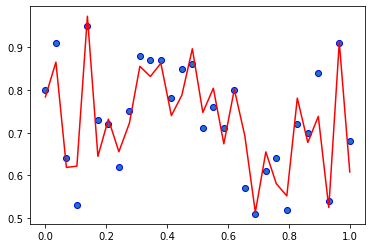

In [105]:
list_x = np.linspace(0, 1, 30)
plt.scatter(list_x, y_test[0:30], edgecolor="b", label="result")
plt.plot(list_x, y_pred[0:30], c="r", label="fitting")

In [106]:
MSE_result = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE_result) 

Mean Squared Error: 0.0032374011934495784


## Discussion

Look like polynomials regression of order M=1 is better than M=2